In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jun-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-jun-2022/data.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('../input/tabular-playground-series-jun-2022/data.csv')
res = pd.read_csv('../input/tabular-playground-series-jun-2022/sample_submission.csv')
df.head()

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,...,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,...,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,2,0.256023,-1.059874,NaN,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,...,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,3,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,...,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,4,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,...,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943


In [4]:
df.drop('row_id',axis=1,inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 80 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   F_1_0   981603 non-null   float64
 1   F_1_1   981784 non-null   float64
 2   F_1_2   981992 non-null   float64
 3   F_1_3   981750 non-null   float64
 4   F_1_4   981678 non-null   float64
 5   F_1_5   981911 non-null   float64
 6   F_1_6   981867 non-null   float64
 7   F_1_7   981872 non-null   float64
 8   F_1_8   981838 non-null   float64
 9   F_1_9   981751 non-null   float64
 10  F_1_10  982039 non-null   float64
 11  F_1_11  981830 non-null   float64
 12  F_1_12  981797 non-null   float64
 13  F_1_13  981602 non-null   float64
 14  F_1_14  981961 non-null   float64
 15  F_2_0   1000000 non-null  int64  
 16  F_2_1   1000000 non-null  int64  
 17  F_2_2   1000000 non-null  int64  
 18  F_2_3   1000000 non-null  int64  
 19  F_2_4   1000000 non-null  int64  
 20  F_2_5   1000000 non-null 

In [6]:
df.reset_index(inplace = True)

In [7]:
df.head()

,index,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,...,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,...,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,2,0.256023,-1.059874,NaN,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,...,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,3,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,...,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,4,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,...,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943


In [8]:
df.shape

(1000000, 81)

In [9]:
df.drop(['index'],axis = 1,inplace = True)

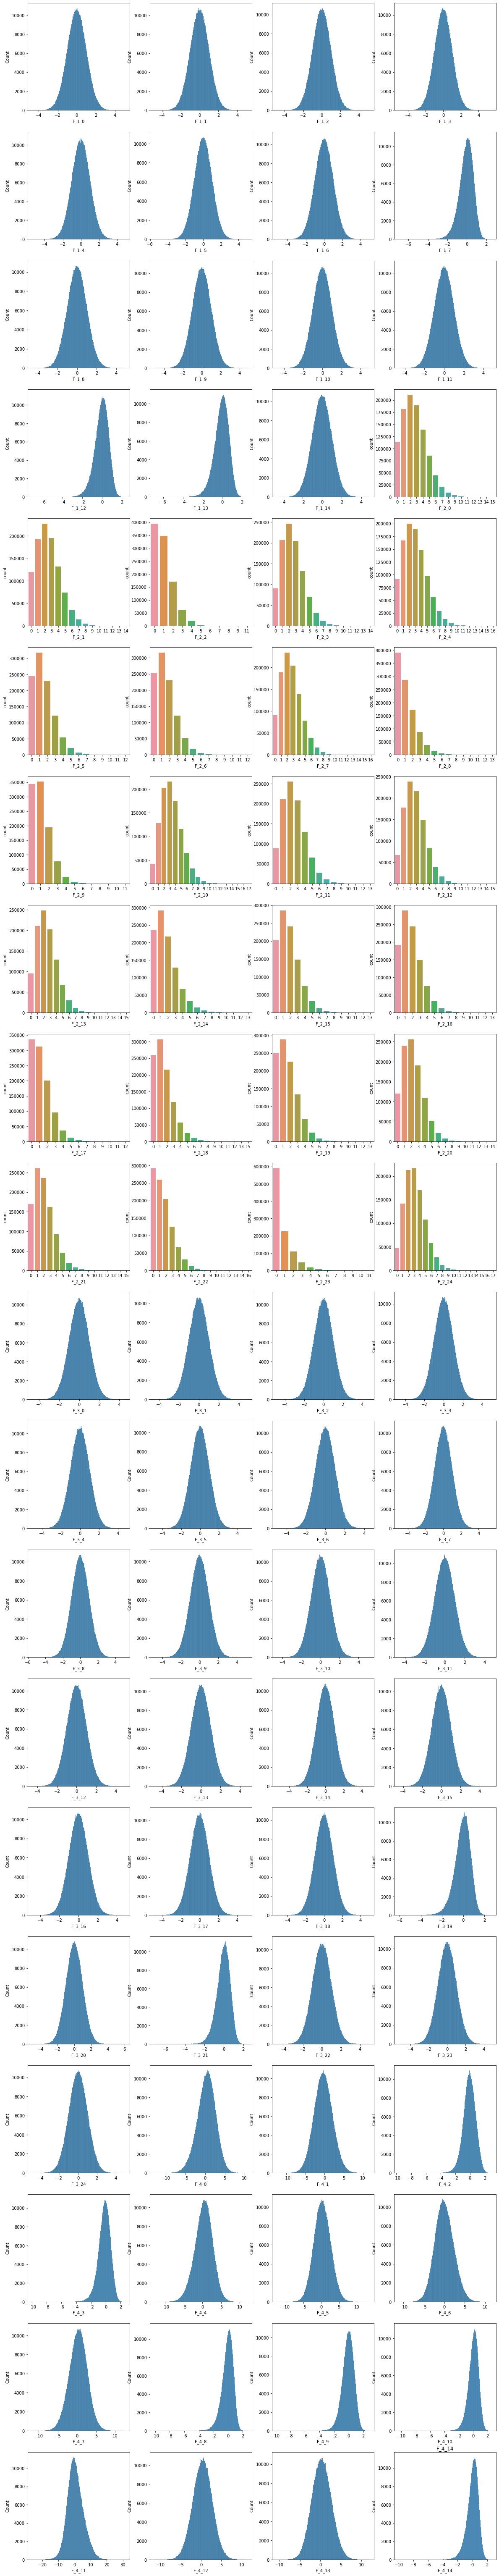

In [10]:
def dist_plot(data):
    fig,axes = plt.subplots(nrows = 20, ncols = 4, figsize=(20,112))
    for ind in range(data.shape[1]):
        val = df.iloc[:,ind]
        i, j = ind//4, ind%4
        if val.dtype == "int64":
            sns.countplot(x=val, data = data, ax = axes[i,j])
        else:
            sns.histplot(x=val,data = data, ax = axes[i,j])
    axes[i,j].set_title(data.columns[ind])
    plt.show()
    
dist_plot(df)

In [11]:
categorical = []
numerical = []
for col in df.columns:
    if df[col].dtype == "int64":
        categorical.append(df[col])
    else:
        numerical.append(df[col])
    

In [12]:
df_num = pd.DataFrame(numerical)
df_num.head()

,0,1,2,3,4,5,6,7,8,9,...,999990,999991,999992,999993,999994,999995,999996,999997,999998,999999
F_1_0,-0.354591,1.380940,0.256023,-0.728420,0.590212,0.088609,0.533210,-1.737332,-0.334935,0.144170,...,1.227262,NaN,-2.379389,-0.299765,0.147997,-0.823740,-0.769106,0.147534,-1.709886,-0.806380
F_1_1,-0.464038,-0.499626,-1.059874,-2.432399,-0.066127,NaN,1.662285,-1.009690,-0.801940,-0.580150,...,1.605984,-0.422000,-2.490550,NaN,1.022144,0.285673,-0.387363,-0.715276,-0.813785,-0.025251
F_1_2,2.304115,-0.418548,NaN,-2.453602,0.468009,0.270489,0.601138,0.294162,-0.754364,-0.896780,...,0.349811,0.492146,-1.926716,-0.558802,-0.442716,0.343307,-1.227469,-0.465049,-1.866536,-0.875477
F_1_3,0.734486,1.911725,0.345678,-0.020509,-1.096038,0.251012,-0.662212,1.002915,-0.369206,-0.550178,...,1.432343,-0.964732,1.182715,0.914719,-1.882994,-0.436747,0.601183,-1.988941,-0.179420,0.802440
F_1_4,1.696395,-0.826130,1.513814,0.333397,0.119399,0.280627,0.033856,0.700551,0.781484,1.231237,...,0.923957,0.315943,-0.005418,-1.086924,1.501444,1.700549,0.351161,-1.594535,2.231478,0.889492


In [13]:
df_cat = pd.DataFrame(categorical)
df_cat.head()

,0,1,2,3,4,5,6,7,8,9,...,999990,999991,999992,999993,999994,999995,999996,999997,999998,999999
F_2_0,2,3,3,2,5,1,0,3,8,1,...,5,6,2,2,3,4,0,5,0,2
F_2_1,2,5,2,3,0,3,4,8,0,1,...,0,2,1,5,0,8,1,3,5,5
F_2_2,0,2,1,2,1,0,1,2,0,2,...,0,0,0,2,1,1,1,1,0,0
F_2_3,3,1,3,1,3,2,1,4,5,4,...,1,1,3,3,4,4,5,2,2,2
F_2_4,2,4,2,1,3,1,2,2,1,4,...,4,6,5,4,2,4,2,1,4,3


<AxesSubplot:ylabel='Frequency'>

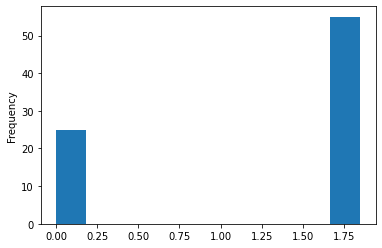

In [14]:
(df.isna().sum()/df.shape[0]*100).plot.hist()

<AxesSubplot:title={'center':'% of values missing'}>

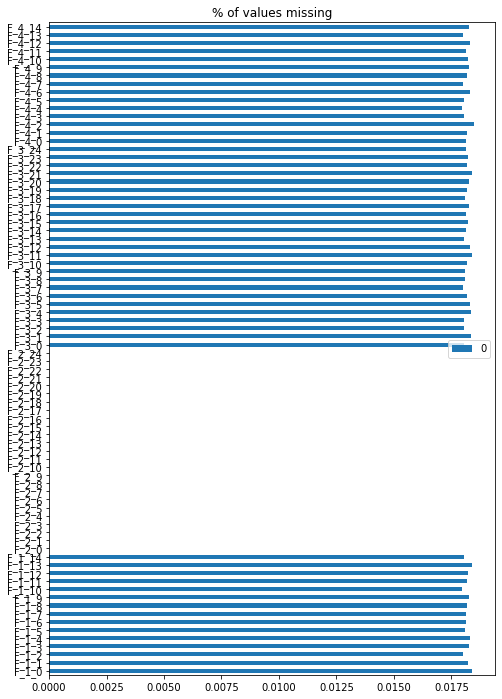

In [15]:
nan_count = pd.DataFrame([df.isna().mean()]).T
nan_count.plot(kind = 'barh', figsize = (8,12), title = '% of values missing')

In [16]:
df['nan_val_count'] = df[[c for c in df.columns]].isna().sum(axis = 1)
df.head()

,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,F_1_9,...,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14,nan_val_count
0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,-0.500665,...,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055,2
1,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,-0.363425,...,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775,1
2,0.256023,-1.059874,NaN,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,0.595777,...,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576,2
3,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,-2.217847,...,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152,1
4,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,-1.143500,...,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943,2


In [17]:
df['nan_val_count'].value_counts()

1    370798
0    364774
2    185543
3     61191
4     14488
5      2723
6       413
7        64
8         4
9         2
Name: nan_val_count, dtype: int64

<AxesSubplot:>

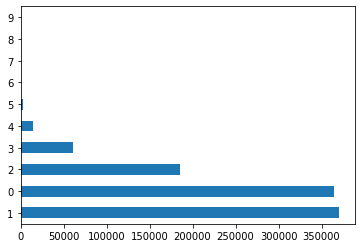

In [18]:
df['nan_val_count'].value_counts().plot(kind = 'barh')

In [19]:
features_with_null = list(column for column in df.columns
    if df[column].isna().sum()>0)
features_with_null

['F_1_0',
 'F_1_1',
 'F_1_2',
 'F_1_3',
 'F_1_4',
 'F_1_5',
 'F_1_6',
 'F_1_7',
 'F_1_8',
 'F_1_9',
 'F_1_10',
 'F_1_11',
 'F_1_12',
 'F_1_13',
 'F_1_14',
 'F_3_0',
 'F_3_1',
 'F_3_2',
 'F_3_3',
 'F_3_4',
 'F_3_5',
 'F_3_6',
 'F_3_7',
 'F_3_8',
 'F_3_9',
 'F_3_10',
 'F_3_11',
 'F_3_12',
 'F_3_13',
 'F_3_14',
 'F_3_15',
 'F_3_16',
 'F_3_17',
 'F_3_18',
 'F_3_19',
 'F_3_20',
 'F_3_21',
 'F_3_22',
 'F_3_23',
 'F_3_24',
 'F_4_0',
 'F_4_1',
 'F_4_2',
 'F_4_3',
 'F_4_4',
 'F_4_5',
 'F_4_6',
 'F_4_7',
 'F_4_8',
 'F_4_9',
 'F_4_10',
 'F_4_11',
 'F_4_12',
 'F_4_13',
 'F_4_14']

In [20]:
numeric_col = df.columns[df.dtypes == 'float64']
category_col = df.columns[df.dtypes == 'int64']

In [21]:
clean_data = df.dropna().reset_index()
clean_data.head()

,index,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14,nan_val_count
0,6,0.533210,1.662285,0.601138,-0.662212,0.033856,-0.056208,-1.781594,0.326768,1.583396,...,4.226621,-1.136903,0.171289,0.703419,-0.779643,4.721938,1.835678,-6.408681,0.538917,0
1,8,-0.334935,-0.801940,-0.754364,-0.369206,0.781484,1.024585,-0.394121,-0.588350,0.092130,...,2.535868,-0.617469,0.107925,-1.063796,-0.128948,3.340392,-0.966351,0.899595,-0.037505,0
2,9,0.144170,-0.580150,-0.896780,-0.550178,1.231237,-0.474318,-1.230894,0.474766,0.367473,...,1.543487,0.823975,0.036584,-1.029416,0.637053,0.681586,1.674981,-1.291278,0.553247,0
3,15,0.386307,-0.164298,-1.208667,0.768579,-2.200503,-1.498463,0.120240,0.865945,1.371115,...,-0.854097,-1.151623,0.480169,-0.112417,0.154438,3.835651,-4.028104,-2.736279,0.190985,0
4,16,0.641497,0.714770,0.958424,0.765871,-1.713403,-1.081687,0.943967,0.329246,2.207749,...,0.674887,1.679765,0.130678,0.421721,0.585881,-0.348452,-0.782981,3.389371,-0.487223,0


In [22]:
clean_data.drop(['index','nan_val_count'],axis=1, inplace = True)

In [23]:
clean_data.head()

,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,F_1_9,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,0.533210,1.662285,0.601138,-0.662212,0.033856,-0.056208,-1.781594,0.326768,1.583396,-0.345895,...,-2.149355,4.226621,-1.136903,0.171289,0.703419,-0.779643,4.721938,1.835678,-6.408681,0.538917
1,-0.334935,-0.801940,-0.754364,-0.369206,0.781484,1.024585,-0.394121,-0.588350,0.092130,0.106974,...,1.075616,2.535868,-0.617469,0.107925,-1.063796,-0.128948,3.340392,-0.966351,0.899595,-0.037505
2,0.144170,-0.580150,-0.896780,-0.550178,1.231237,-0.474318,-1.230894,0.474766,0.367473,-0.256849,...,-1.630001,1.543487,0.823975,0.036584,-1.029416,0.637053,0.681586,1.674981,-1.291278,0.553247
3,0.386307,-0.164298,-1.208667,0.768579,-2.200503,-1.498463,0.120240,0.865945,1.371115,1.627371,...,-0.100488,-0.854097,-1.151623,0.480169,-0.112417,0.154438,3.835651,-4.028104,-2.736279,0.190985
4,0.641497,0.714770,0.958424,0.765871,-1.713403,-1.081687,0.943967,0.329246,2.207749,-1.027082,...,2.923529,0.674887,1.679765,0.130678,0.421721,0.585881,-0.348452,-0.782981,3.389371,-0.487223


In [24]:
result = clean_data.copy()

In [25]:
for col in features_with_null:
    selected_ind = clean_data[col].sample(frac = 0.018).index
    clean_data.loc[selected_ind,col] = np.nan

In [26]:
clean_data.isna().sum()

F_1_0     6566
F_1_1     6566
F_1_2     6566
F_1_3     6566
F_1_4     6566
          ... 
F_4_10    6566
F_4_11    6566
F_4_12    6566
F_4_13    6566
F_4_14    6566
Length: 80, dtype: int64

In [27]:
data = clean_data.T.to_numpy()
#data = data.reshape(364774,80)
data

array([[ 5.332100e-01, -3.349350e-01,  1.441700e-01, ..., -7.691060e-01,
        -1.709886e+00, -8.063800e-01],
       [ 1.662285e+00, -8.019400e-01, -5.801500e-01, ..., -3.873630e-01,
        -8.137850e-01, -2.525100e-02],
       [ 6.011380e-01, -7.543640e-01, -8.967800e-01, ..., -1.227469e+00,
        -1.866536e+00, -8.754770e-01],
       ...,
       [ 1.835678e+00, -9.663510e-01,  1.674981e+00, ...,  1.903850e-01,
        -1.085554e+00,  2.334131e+00],
       [-6.408681e+00,  8.995950e-01, -1.291278e+00, ..., -3.441120e-01,
         3.122423e+00,  5.425421e+00],
       [ 5.389170e-01, -3.750500e-02,  5.532470e-01, ..., -3.468070e-01,
         4.831000e-03, -8.288470e-01]])

In [28]:
data.shape

(80, 364774)

In [29]:
res_data = result.T.to_numpy()
res_data

array([[ 5.332100e-01, -3.349350e-01,  1.441700e-01, ..., -7.691060e-01,
        -1.709886e+00, -8.063800e-01],
       [ 1.662285e+00, -8.019400e-01, -5.801500e-01, ..., -3.873630e-01,
        -8.137850e-01, -2.525100e-02],
       [ 6.011380e-01, -7.543640e-01, -8.967800e-01, ..., -1.227469e+00,
        -1.866536e+00, -8.754770e-01],
       ...,
       [ 1.835678e+00, -9.663510e-01,  1.674981e+00, ...,  1.903850e-01,
        -1.085554e+00,  2.334131e+00],
       [-6.408681e+00,  8.995950e-01, -1.291278e+00, ..., -3.441120e-01,
         3.122423e+00,  5.425421e+00],
       [ 5.389170e-01, -3.750500e-02,  5.532470e-01, ..., -3.468070e-01,
         4.831000e-03, -8.288470e-01]])

In [30]:
res_data.shape

(80, 364774)

In [31]:
from tempfile import mkdtemp
import os.path as path
from sklearn.impute import KNNImputer

In [32]:
filename = path.join(mkdtemp(), 'dataset.dat')

In [33]:
fpx = np.memmap(filename, dtype='float32', mode='w+', shape=(80,364774))
fpx

memmap([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [34]:
fpx[:] = data[:]
fpx

memmap([[ 5.332100e-01, -3.349350e-01,  1.441700e-01, ..., -7.691060e-01,
         -1.709886e+00, -8.063800e-01],
        [ 1.662285e+00, -8.019400e-01, -5.801500e-01, ..., -3.873630e-01,
         -8.137850e-01, -2.525100e-02],
        [ 6.011380e-01, -7.543640e-01, -8.967800e-01, ..., -1.227469e+00,
         -1.866536e+00, -8.754770e-01],
        ...,
        [ 1.835678e+00, -9.663510e-01,  1.674981e+00, ...,  1.903850e-01,
         -1.085554e+00,  2.334131e+00],
        [-6.408681e+00,  8.995950e-01, -1.291278e+00, ..., -3.441120e-01,
          3.122423e+00,  5.425421e+00],
        [ 5.389170e-01, -3.750500e-02,  5.532470e-01, ..., -3.468070e-01,
          4.831000e-03, -8.288470e-01]], dtype=float32)

In [35]:
np.isnan(fpx).sum()

361130

In [36]:
fpx.flush()

In [37]:
imputer = KNNImputer(n_neighbors = 7)
imputer.fit(fpx)
npfx = imputer.transform(fpx) 

In [38]:
npfx

array([[ 5.332100e-01, -3.349350e-01,  1.441700e-01, ..., -7.691060e-01,
        -1.709886e+00, -8.063800e-01],
       [ 1.662285e+00, -8.019400e-01, -5.801500e-01, ..., -3.873630e-01,
        -8.137850e-01, -2.525100e-02],
       [ 6.011380e-01, -7.543640e-01, -8.967800e-01, ..., -1.227469e+00,
        -1.866536e+00, -8.754770e-01],
       ...,
       [ 1.835678e+00, -9.663510e-01,  1.674981e+00, ...,  1.903850e-01,
        -1.085554e+00,  2.334131e+00],
       [-6.408681e+00,  8.995950e-01, -1.291278e+00, ..., -3.441120e-01,
         3.122423e+00,  5.425421e+00],
       [ 5.389170e-01, -3.750500e-02,  5.532470e-01, ..., -3.468070e-01,
         4.831000e-03, -8.288470e-01]], dtype=float32)

In [39]:
np.isnan(npfx).sum()

0

In [40]:
from sklearn.metrics import mean_squared_error, confusion_matrix
np.sqrt(mean_squared_error(npfx,res_data))

0.1590035873338794

In [41]:
finalset = df.drop('nan_val_count',axis=1).T.to_numpy()
finalset

array([[-3.545910e-01,  1.380940e+00,  2.560230e-01, ...,  1.475340e-01,
        -1.709886e+00, -8.063800e-01],
       [-4.640380e-01, -4.996260e-01, -1.059874e+00, ..., -7.152760e-01,
        -8.137850e-01, -2.525100e-02],
       [ 2.304115e+00, -4.185480e-01,           nan, ..., -4.650490e-01,
        -1.866536e+00, -8.754770e-01],
       ...,
       [ 3.809505e+00, -4.218259e+00, -2.131747e+00, ..., -5.841080e-01,
        -1.085554e+00,  2.334131e+00],
       [ 1.236486e+00, -2.724883e+00,  3.661499e+00, ..., -1.492096e+00,
         3.122423e+00,  5.425421e+00],
       [ 1.182055e+00, -6.377500e-02, -1.315760e-01, ..., -9.975020e-01,
         4.831000e-03, -8.288470e-01]])

In [42]:
imputer.fit(finalset)
nf =  imputer.transform(finalset)

In [43]:
nf

array([[-3.54591000e-01,  1.38094000e+00,  2.56023000e-01, ...,
         1.47534000e-01, -1.70988600e+00, -8.06380000e-01],
       [-4.64038000e-01, -4.99626000e-01, -1.05987400e+00, ...,
        -7.15276000e-01, -8.13785000e-01, -2.52510000e-02],
       [ 2.30411500e+00, -4.18548000e-01, -2.34670714e-01, ...,
        -4.65049000e-01, -1.86653600e+00, -8.75477000e-01],
       ...,
       [ 3.80950500e+00, -4.21825900e+00, -2.13174700e+00, ...,
        -5.84108000e-01, -1.08555400e+00,  2.33413100e+00],
       [ 1.23648600e+00, -2.72488300e+00,  3.66149900e+00, ...,
        -1.49209600e+00,  3.12242300e+00,  5.42542100e+00],
       [ 1.18205500e+00, -6.37750000e-02, -1.31576000e-01, ...,
        -9.97502000e-01,  4.83100000e-03, -8.28847000e-01]])

In [44]:
nf.shape
nf = nf.reshape(80,1000000)

In [45]:
ans = pd.DataFrame(nf,index=list(df.drop('nan_val_count',axis=1).columns))

In [46]:
ans.head()

,0,1,2,3,4,5,6,7,8,9,...,999990,999991,999992,999993,999994,999995,999996,999997,999998,999999
F_1_0,-0.354591,1.380940,0.256023,-0.728420,0.590212,0.088609,0.533210,-1.737332,-0.334935,0.144170,...,1.227262,-0.091164,-2.379389,-0.299765,0.147997,-0.823740,-0.769106,0.147534,-1.709886,-0.806380
F_1_1,-0.464038,-0.499626,-1.059874,-2.432399,-0.066127,-0.082815,1.662285,-1.009690,-0.801940,-0.580150,...,1.605984,-0.422000,-2.490550,0.491257,1.022144,0.285673,-0.387363,-0.715276,-0.813785,-0.025251
F_1_2,2.304115,-0.418548,-0.234671,-2.453602,0.468009,0.270489,0.601138,0.294162,-0.754364,-0.896780,...,0.349811,0.492146,-1.926716,-0.558802,-0.442716,0.343307,-1.227469,-0.465049,-1.866536,-0.875477
F_1_3,0.734486,1.911725,0.345678,-0.020509,-1.096038,0.251012,-0.662212,1.002915,-0.369206,-0.550178,...,1.432343,-0.964732,1.182715,0.914719,-1.882994,-0.436747,0.601183,-1.988941,-0.179420,0.802440
F_1_4,1.696395,-0.826130,1.513814,0.333397,0.119399,0.280627,0.033856,0.700551,0.781484,1.231237,...,0.923957,0.315943,-0.005418,-1.086924,1.501444,1.700549,0.351161,-1.594535,2.231478,0.889492


In [47]:
res

,row-col,value
0,0-F_1_14,0.0
1,0-F_3_23,0.0
2,1-F_3_24,0.0
3,2-F_1_2,0.0
4,2-F_4_2,0.0
...,...,...
999995,999993-F_4_2,0.0
999996,999994-F_3_10,0.0
999997,999994-F_4_9,0.0
999998,999997-F_3_14,0.0


In [48]:
str='0-F_1_14'
x= str.split("-")
x[1], int(x[0])

('F_1_14', 0)

In [49]:
for i,col,val in zip(range(res.shape[0]),res['row-col'],res['value']):
    x = col.split("-")
    val = ans.loc[x[1],int(x[0])]
    res['value'][i] = val
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [50]:
res

,row-col,value
0,0-F_1_14,0.366867
1,0-F_3_23,0.366867
2,1-F_3_24,-0.111688
3,2-F_1_2,-0.234671
4,2-F_4_2,-0.303159
...,...,...
999995,999993-F_4_2,0.384893
999996,999994-F_3_10,0.045120
999997,999994-F_4_9,0.190936
999998,999997-F_3_14,-0.603940


In [51]:
res.to_csv('submission',index = False)